In [1]:
import torch

In [4]:
graphs = torch.load('data/datasets/gas_649_max_sigma5_int/graphs.pt')
graphs

/tmp/ipykernel_2318160/463437891.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  graphs = torch.load('data/datasets/gas_649_max_sigma5_int/graphs.pt')


[Data(x=[4539, 42], edge_index=[2, 18272], edge_attr=[18044, 33], y=[900], smiles='COC(=O)CCc1cc(OC)c(C(C)(C)C)cc1-c1ccc[nH]c1=O', symbol=[117]),
 Data(x=[1046, 42], edge_index=[2, 4232], edge_attr=[4132, 33], y=[900], smiles='Cc1cc(O)ccc1CC(=O)O', symbol=[54]),
 Data(x=[921, 42], edge_index=[2, 3726], edge_attr=[3634, 33], y=[900], smiles='COC(=O)c1ccc(N)n1C', symbol=[51]),
 Data(x=[2734, 42], edge_index=[2, 11010], edge_attr=[10858, 33], y=[900], smiles='Oc1ccc(-c2cc(F)c3c(Cl)c(O)ccc3c2Cl)cc1', symbol=[82]),
 Data(x=[2636, 42], edge_index=[2, 10640], edge_attr=[10468, 33], y=[900], smiles='CN(C)c1ccc(Cc2n[nH]c3ncc(Br)cc23)cc1', symbol=[86]),
 Data(x=[1704, 42], edge_index=[2, 6850], edge_attr=[6746, 33], y=[900], smiles='COC(=O)c1ccc(C(F)(F)Cl)nc1C', symbol=[64]),
 Data(x=[154, 42], edge_index=[2, 630], edge_attr=[594, 33], y=[900], smiles='CC(C)=O', symbol=[22]),
 Data(x=[2149, 42], edge_index=[2, 8666], edge_attr=[8518, 33], y=[900], smiles='C=C(C(=O)OCC)c1ccc(OC)cc1OC', symbol=[79

In [ ]:
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

# Get first graph's symbols and node count
graph = graphs[0]
symbols = graph.symbol
num_nodes = graph.x.shape[0]

# Create labels dictionary - first len(symbol) nodes get their symbol, rest get "INT"
labels = {}
for i in range(num_nodes):
    if i < len(symbols):
        labels[i] = symbols[i]
    else:
        labels[i] = "INT"

# Convert to networkx graph
G = to_networkx(graph)

# Set up plot
plt.figure(figsize=(12,12))

# Draw graph with labels
pos = nx.spring_layout(G, k=1, iterations=1)
nx.draw(G, pos, 
        node_color='lightblue',
        node_size=500,
        with_labels=True,
        labels=labels,
        font_size=8)

plt.title("Graph Visualization with Node Labels")
plt.show()


/home/jose/simg_ir/.venv/lib64/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))
Analyzing graphs: 100%|██████████| 649/649 [00:34<00:00, 18.87it/s]


Average largest connected component size: 2601.44
Median largest connected component size: 2243.00
Min largest connected component size: 31
Max largest connected component size: 6624


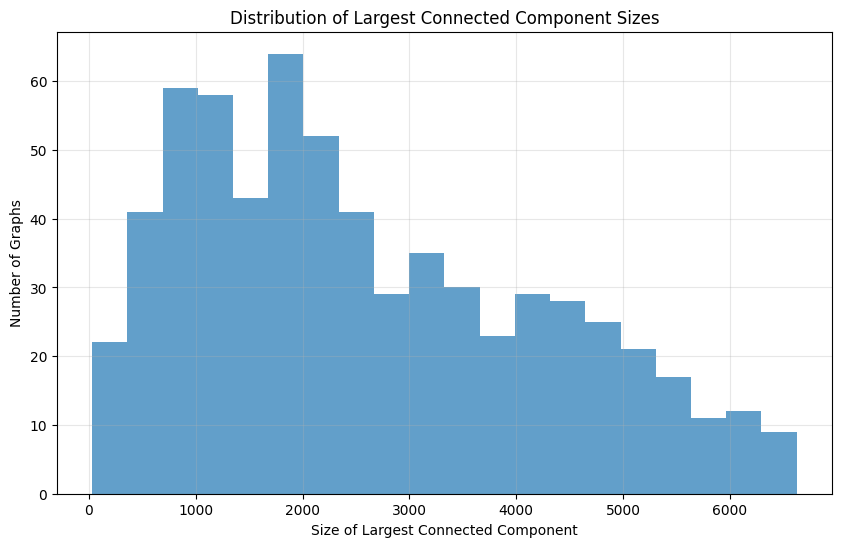

In [3]:
import numpy as np
import networkx as nx
from torch_geometric.utils import to_networkx
from tqdm import tqdm

# Function to find the largest connected component size for each graph
def get_largest_connected_component_size(graph):
    # Convert PyG graph to NetworkX graph (only considering atom-atom connections)
    G = to_networkx(graph, to_undirected=True)
    
    # Find connected components
    connected_components = list(nx.connected_components(G))
    
    # Return size of largest component (or 0 if no components)
    if connected_components:
        return max(len(component) for component in connected_components)
    else:
        return 0

# Calculate largest connected component size for each graph
largest_cc_sizes = []
for graph in tqdm(graphs, desc="Analyzing graphs"):
    largest_cc_sizes.append(get_largest_connected_component_size(graph))

# Display statistics
print(f"Average largest connected component size: {np.mean(largest_cc_sizes):.2f}")
print(f"Median largest connected component size: {np.median(largest_cc_sizes):.2f}")
print(f"Min largest connected component size: {min(largest_cc_sizes)}")
print(f"Max largest connected component size: {max(largest_cc_sizes)}")

# Plot histogram of largest connected component sizes
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(largest_cc_sizes, bins=20, alpha=0.7)
plt.xlabel('Size of Largest Connected Component')
plt.ylabel('Number of Graphs')
plt.title('Distribution of Largest Connected Component Sizes')
plt.grid(alpha=0.3)
plt.show()


In [7]:
node_len = [len(graph.x) for graph in graphs]
node_len

[4539,
 1046,
 921,
 2734,
 2636,
 1704,
 154,
 2149,
 690,
 379,
 698,
 587,
 2146,
 743,
 377,
 454,
 2952,
 5431,
 2848,
 2838,
 2948,
 1539,
 1967,
 55,
 1548,
 859,
 5984,
 3898,
 237,
 1049,
 3641,
 1793,
 4810,
 1393,
 5674,
 416,
 1624,
 372,
 3753,
 5526,
 381,
 1626,
 859,
 3524,
 2245,
 2230,
 3399,
 2952,
 4271,
 2054,
 5081,
 1108,
 2741,
 5375,
 3757,
 5094,
 4671,
 3177,
 2336,
 3058,
 4797,
 1705,
 3892,
 5086,
 1970,
 1393,
 2535,
 749,
 4011,
 1968,
 1244,
 5226,
 6138,
 1048,
 1392,
 1790,
 4139,
 5521,
 1471,
 5379,
 1881,
 4011,
 2051,
 3174,
 3523,
 5673,
 802,
 1703,
 4537,
 858,
 5092,
 1794,
 925,
 4140,
 1110,
 6298,
 1789,
 1623,
 497,
 919,
 3060,
 4009,
 1174,
 6141,
 2338,
 1551,
 3763,
 4135,
 1706,
 3065,
 1320,
 744,
 2529,
 6297,
 3061,
 1177,
 3764,
 2248,
 1247,
 1397,
 3395,
 1468,
 1045,
 3063,
 4944,
 1958,
 1245,
 1112,
 2139,
 2151,
 1966,
 6466,
 1250,
 2153,
 2145,
 2144,
 1624,
 1879,
 1877,
 2534,
 2627,
 1880,
 2952,
 2628,
 2432,
 1115,
 5

In [8]:
node_len == largest_cc_sizes

True

In [16]:
# Function to visualize a graph with node labels
def visualize_graph(graph_idx):
    graph = graphs[graph_idx]
    
    # Convert PyG graph to NetworkX graph
    G = to_networkx(graph, to_undirected=True)
    
    # Get positions for nodes
    pos = nx.spring_layout(G, seed=42)
    
    # Create figure
    plt.figure(figsize=(12, 10))
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=10, alpha=0.8)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7)
    
    # Add node labels using symbol information
    # Fix: handle both tensor and string symbol types
    labels = {}
    for i in range(len(graph.symbol)):
        if hasattr(graph.symbol[i], 'item'):
            labels[i] = graph.symbol[i].item()
        else:
            labels[i] = graph.symbol[i]  # Use as is if it's already a string
    
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)
    
    plt.title(f"Graph {graph_idx} - SMILES: {graph.smiles}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
